# Exploring the trajectory of a single patient

### Import Python libraries

We first need to import some tools for working with data in Python. 
- NumPy is for working with numbers
- Pandas is for analysing data
- MatPlotLib is for making plots
- Sqlite3 to connect to the database

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
%matplotlib inline

### Connect to the database

- We can use the sqlite3 library to connect to the MIMIC database
- Once the connection is established, we'll run a simple SQL query.

In [2]:
# Connect to the MIMIC database
try: 
    conn = psycopg2.connect("dbname='mimic' user='tompollard' host='localhost' password='postgres'")
except: 
    print('meh')

In [16]:
# Create our test query
test_query = """
SELECT subject_id, hadm_id, admittime, dischtime, diagnosis, admission_type, deathtime, discharge_location
FROM mimiciii.admissions
"""

In [17]:
# Run the query and assign the results to a variable
test = pd.read_sql_query(test_query,conn)

In [18]:
# Display the first few rows
test

,subject_id,hadm_id,admittime,dischtime,diagnosis,admission_type,deathtime,discharge_location
0,87,190659,2191-02-25 20:30:00,2191-04-25 15:18:00,NEWBORN,NEWBORN,None,SHORT TERM HOSPITAL
1,88,123010,2111-08-29 03:03:00,2111-09-03 14:24:00,S/P MOTOR VEHICLE ACCIDENT-STABBING,EMERGENCY,None,HOME
2,89,188646,2185-06-17 05:22:00,2185-06-21 11:15:00,NEWBORN,NEWBORN,None,SHORT TERM HOSPITAL
3,91,121205,2177-04-23 00:08:00,2177-05-10 15:16:00,FEVER,EMERGENCY,2177-05-10 15:16:00,DEAD/EXPIRED
4,92,142807,2122-12-13 19:30:00,2123-03-04 13:47:00,NEWBORN,NEWBORN,None,SHORT TERM HOSPITAL
5,93,160481,2128-03-17 17:11:00,2128-06-17 15:00:00,NEWBORN,NEWBORN,None,HOME HEALTH CARE
6,94,183686,2176-02-25 16:49:00,2176-02-29 17:45:00,SEPSIS,EMERGENCY,None,HOME HEALTH CARE
7,94,140037,2176-09-02 14:22:00,2176-09-25 13:15:00,PNEUMONIA,EMERGENCY,None,SNF
8,95,160891,2157-12-25 16:28:00,2157-12-27 15:25:00,COMPLETE HEART BLOCK,EMERGENCY,None,HOME
9,96,170324,2156-03-31 16:11:00,2156-04-29 15:05:00,S/P FALL,EMERGENCY,None,HOME


### Load the chartevents data

- The chartevents table contains data charted at the patient bedside. It includes variables such as heart rate, respiratory rate, temperature, and so on.
- We'll begin by loading the chartevents data for a single patient.

In [153]:
query = """
SELECT de.icustay_id
  , EXTRACT(EPOCH FROM de.charttime-ie.intime)/3600/24 as HOURS
  , di.label
  , de.value
  , de.valuenum
  , de.uom
FROM mimiciii.chartevents de
INNER join mimiciii.d_items di
ON de.itemid = di.itemid
INNER join mimiciii.icustays ie
ON de.icustay_id = ie.icustay_id
WHERE de.icustay_id = 236942
ORDER BY charttime;
"""

ce = pd.read_sql_query(query,conn)


# OPTION 2: load chartevents from a CSV file
# ce = pd.read_csv('data/example_chartevents.csv', index_col='HOURSSINCEADMISSION')

In [154]:
# Preview the data
# Use 'head' to limit the number of rows returned
ce.head()

,icustay_id,hours,label,value,valuenum,uom
0,236942,0.013970,Heart Rate,138,138,bpm
1,236942,0.014664,Respiratory Rate,24,24,insp/min
2,236942,0.014664,O2 saturation pulseoxymetry,72,72,%
3,236942,0.015359,Arterial Blood Pressure systolic,147,147,mmHg
4,236942,0.015359,Arterial Blood Pressure diastolic,77,77,mmHg


### Review the patient's heart rate

- We can select individual columns using the column name. 
- For example, if we want to select just the label column, we write **```ce.LABEL```** or alternatively **```ce['LABEL']```**

In [86]:
# Select a single column
ce['label'].head()

0                           Heart Rate
1                     Respiratory Rate
2          O2 saturation pulseoxymetry
3     Arterial Blood Pressure systolic
4    Arterial Blood Pressure diastolic
Name: label, dtype: object

- In a similar way, we can select rows from data using indexes. 
- For example, to select rows where the label is equal to 'Heart Rate', we would create an index using **```[ce.LABEL=='Heart Rate']```** 

In [136]:
# Select just the heart rate rows using an index
ce.label.unique()

array(['Heart Rate', 'Respiratory Rate', 'O2 saturation pulseoxymetry',
       'Arterial Blood Pressure systolic',
       'Arterial Blood Pressure diastolic', 'Arterial Blood Pressure mean',
       'INR', 'PTT', 'Prothrombin time', 'Platelet Count',
       'Hematocrit (serum)', 'WBC', 'Chloride (serum)', 'HCO3 (serum)',
       'Potassium (serum)', 'Anion gap', 'Phosphorous',
       'Calcium non-ionized', 'BUN', 'Creatinine', 'Hemoglobin',
       'Magnesium', 'Sodium (serum)', 'Glucose (serum)', 'Fibrinogen',
       'PH (Arterial)', 'Arterial Base Excess', 'Ionized Calcium',
       'Lactic Acid', 'TCO2 (calc) Arterial', 'Arterial O2 pressure',
       'Arterial CO2 Pressure', 'Expiratory Ratio',
       'Respiratory Rate (Set)', 'Respiratory Rate (spontaneous)',
       'Respiratory Rate (Total)', 'Peak Insp. Pressure',
       'Inspiratory Time', 'PEEP set', 'Tidal Volume (set)',
       'Tidal Volume (observed)', 'Minute Volume', 'Mean Airway Pressure',
       'Inspiratory Ratio', 'O2 Satu

### Plot 1: How did the patients heart rate change over time?

- Using the methods described above to select our data of interest, we can create our x and y axis values to create a time series plot of heart rate.

In [88]:
# Which time stamps have a corresponding heart rate measurement?
print ce.index[ce.label=='Heart Rate']

Int64Index([   0,   74,  109,  125,  137,  147,  166,  171,  204,  257, 
            ...
            5998, 6003, 6015, 6020, 6045, 6056, 6060, 6068, 6076, 6088],
           dtype='int64', length=328)


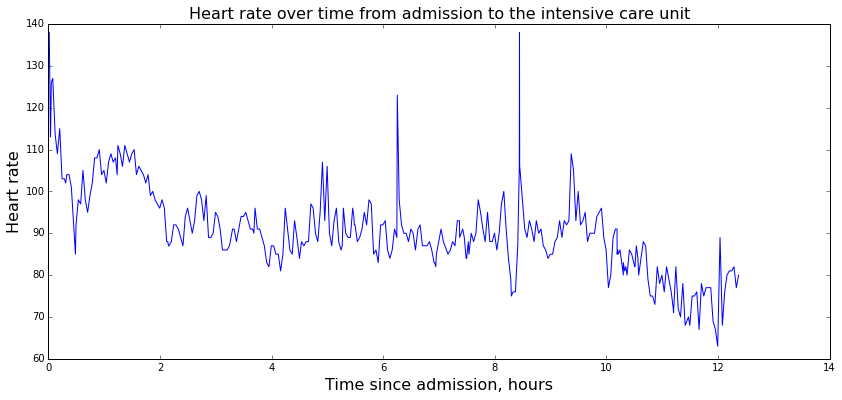

In [155]:
# Set x equal to the times
x_hr = ce.hours[ce.label=='Heart Rate']

# Set y equal to the heart rates
y_hr = ce.valuenum[ce.label=='Heart Rate']

# Plot time against heart rate
plt.figure(figsize=(14, 6))
plt.plot(x_hr,y_hr)


plt.xlabel('Time since admission, hours',fontsize=16)
plt.ylabel('Heart rate',fontsize=16)
plt.title('Heart rate over time from admission to the intensive care unit',fontsize=16)

### Task 1

* What is happening to this patient's heart rate?
* Plot respiratory rate over time for the patient.
* Is there anything unusual about the patient's respiratory rate?


In [ ]:
# Exercise 1 here



### Plot 2: Did the patient's vital signs breach any alarm thresholds?

- Alarm systems in the intensive care unit are commonly based on high and low thresholds defined by the carer.
- False alarms are often a problem and so thresholds may be set arbitrarily to reduce alarms.
- As a result, alarm settings carry limited information.

(0, 55)

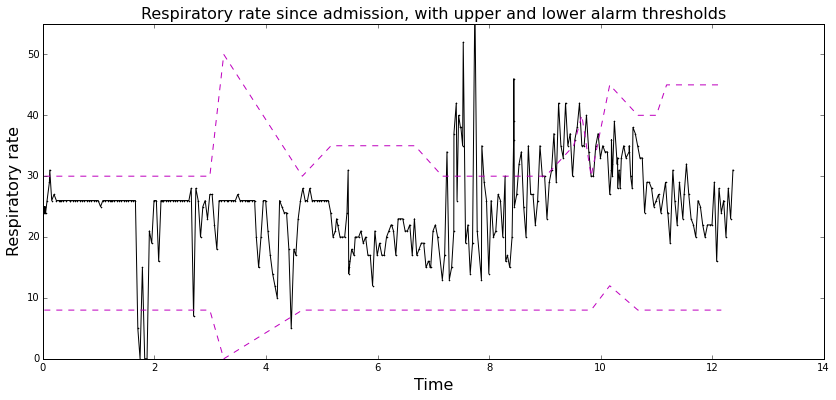

In [156]:
plt.figure(figsize=(14, 6))

plt.plot(ce.hours[ce.label=='Respiratory Rate'], 
         ce.valuenum[ce.label=='Respiratory Rate'],
         'k+-', markersize=2, linewidth=1)

plt.plot(ce.hours[ce.label=='Resp Alarm - High'], 
         ce.valuenum[ce.label=='Resp Alarm - High'],
         'm--')

plt.plot(ce.hours[ce.label=='Resp Alarm - Low'], 
         ce.valuenum[ce.label=='Resp Alarm - Low'],
         'm--')

plt.xlabel('Time',fontsize=16)
plt.ylabel('Respiratory rate',fontsize=16)
plt.title('Respiratory rate since admission, with upper and lower alarm thresholds',fontsize=16)
plt.ylim(0,55)


### Task 2

- Based on the data, does it look like the alarms would have triggered for this patient?


### Plot 3: What is patient's level of consciousness?

- Glasgow Coma Scale (GCS) is a measure of consciousness.
- It is commonly used for monitoring patients in the intensive care unit. 
- It consists of three components: eye response; verbal response; motor response.

In [30]:
# Display the first few rows of the GCS eye response data
ce[ce.label=='GCS - Eye Opening'].head()

,icustay_id,hours,label,value,valuenum,uom
124,236942,0 days 23:14:48,GCS - Eye Opening,None,1,
224,236942,3 days 21:38:48,GCS - Eye Opening,None,1,
376,236942,8 days 08:50:48,GCS - Eye Opening,None,1,
479,236942,12 days 02:50:48,GCS - Eye Opening,None,1,
591,236942,15 days 20:26:48,GCS - Eye Opening,To Pain,2,


(10, 180)

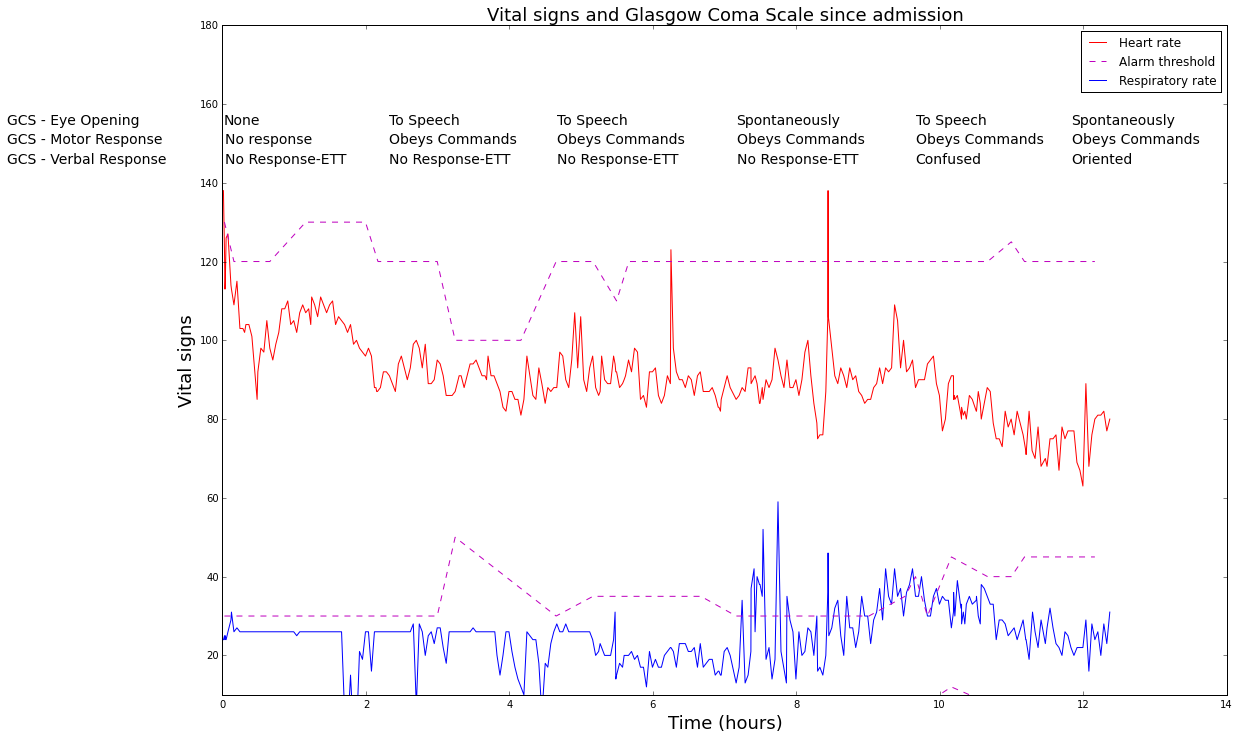

In [163]:
# Prepare the size of the figure
plt.figure(figsize=(18, 12))

# Set x equal to the times
x_hr = ce.hours[ce.label=='Heart Rate']

# Set y equal to the heart rates
y_hr = ce.valuenum[ce.label=='Heart Rate']

plt.plot(x_hr,y_hr,'r-',label='Heart rate')

plt.plot(ce.hours[ce.label=='Heart rate Alarm - High'], 
         ce.valuenum[ce.label=='Heart rate Alarm - High'],
         'm--')

plt.plot(ce.hours[ce.label=='Heart rate Alarm - Low'], 
         ce.valuenum[ce.label=='Heart rate Alarm - Low'],
         'm--', label='Alarm threshold')

plt.plot(ce.hours[ce.label=='Respiratory Rate'], 
         ce.valuenum[ce.label=='Respiratory Rate'],
         'b-', markersize=6,label='Respiratory rate')

plt.plot(ce.hours[ce.label=='Resp Alarm - High'], 
         ce.valuenum[ce.label=='Resp Alarm - High'],
         'm--')

plt.plot(ce.hours[ce.label=='Resp Alarm - Low'], 
         ce.valuenum[ce.label=='Resp Alarm - Low'],
         'm--')

# Add a text label to the y-axis
plt.text(-3,155,'GCS - Eye Opening',fontsize=14)
plt.text(-3,150,'GCS - Motor Response',fontsize=14)
plt.text(-3,145,'GCS - Verbal Response',fontsize=14)   

# Iterate over list of GCS labels, plotting around 1 in 10 to avoid overlap
for i, txt in enumerate(ce.value[ce.label=='GCS - Eye Opening'].values):
    if np.mod(i,14)==0 and i < 75:
        plt.annotate(txt, (ce.hours[ce.label=='GCS - Eye Opening'].values[i],155),fontsize=14)
        
for i, txt in enumerate(ce.value[ce.label=='GCS - Motor Response'].values):
    if np.mod(i,14)==0 and i < 75:
        plt.annotate(txt, (ce.hours[ce.label=='GCS - Motor Response'].values[i],150),fontsize=14)

for i, txt in enumerate(ce.value[ce.label=='GCS - Verbal Response'].values):
    if np.mod(i,14)==0 and i < 75:
        plt.annotate(txt, (ce.hours[ce.label=='GCS - Verbal Response'].values[i],145),fontsize=14)

plt.title('Vital signs and Glasgow Coma Scale since admission',fontsize=18)

plt.xlabel('Time (hours)',fontsize=18)
plt.ylabel('Vital signs',fontsize=18)
plt.legend(loc=1)
plt.ylim(10,180)


### Task 3

- How is the patient's consciousness changing over time?

# Stop here...

### Plot 4: What other data do we have on the patient?

- Using Pandas 'read_csv function' again, we'll now load the outputevents data - this table contains all information about patient outputs (urine output, drains, dialysis).

In [108]:
# OPTION 1: load outputs from the patient
query = """
select de.icustay_id
  , EXTRACT(EPOCH FROM de.charttime-ie.intime)/3600 as HOURS
  , di.label
  , de.value
  , de.valueuom
from mimiciii.outputevents de 
inner join mimiciii.icustays ie
  on de.icustay_id = ie.icustay_id
inner join mimiciii.d_items di
  on de.itemid = di.itemid
where de.subject_id = 49205
order by charttime;
"""

oe = pd.read_sql_query(query,conn)

In [109]:
oe.head()

,icustay_id,hours,label,value,valueuom
0,236942,0.701944,Foley,800,mL
1,236942,1.235278,Foley,240,mL
2,236942,1.251944,Jackson Pratt #1,80,mL
3,236942,1.468611,Chest Tube #1,210,mL
4,236942,1.918611,Foley,130,mL


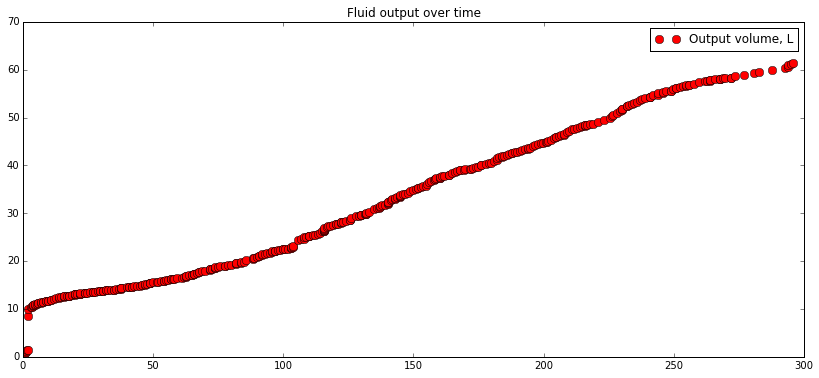

In [110]:
plt.figure(figsize=(14, 10))

plt.figure(figsize=(14, 6))
plt.title('Fluid output over time')

plt.plot(oe.hours, 
         oe.value.cumsum()/1000, 
         'ro', markersize=8, label='Output volume, L')

# plt.xlim(0,72)
# plt.ylim(0,10)
plt.legend()

To provide necessary context to this plot, it would help to include patient input data. This provides the necessary context to determine a patient's fluid balance - a key indicator in patient health.

In [114]:
# OPTION 1: load inputs given to the patient (usually intravenously) using the database connection
query = """
select de.icustay_id
  , EXTRACT(EPOCH FROM de.starttime-ie.intime)/3600 as HOURS_START
  , EXTRACT(EPOCH FROM de.endtime-ie.intime)/3600 as HOURS_END
  , de.linkorderid
  , di.label
  , de.amount
  , de.amountuom
  , de.rate
  , de.rateuom
from mimiciii.inputevents_mv de 
inner join mimiciii.icustays ie
  on de.icustay_id = ie.icustay_id
inner join mimiciii.d_items di
  on de.itemid = di.itemid
where de.subject_id = 49205
order by endtime;
"""

ie = pd.read_sql_query(query,conn)

# # OPTION 2: load ioevents using the CSV file with endtime as the index
# ioe = pd.read_csv('inputevents.csv'
#                   ,header=None
#                   ,names=['subject_id','itemid','label','starttime','endtime','amount','amountuom','rate','rateuom']
#                   ,parse_dates=True)

In [115]:
ie.head()

,icustay_id,hours_start,hours_end,linkorderid,label,amount,amountuom,rate,rateuom
0,236942,0.851944,0.868611,3046501,Solution,10,mL,NaN,
1,236942,0.851944,0.868611,3046501,Pantoprazole (Protonix),1,dose,NaN,
2,236942,1.585278,1.601944,6655809,LR,1000,mL,NaN,
3,236942,2.118611,2.135278,454417,Cefazolin,1,dose,NaN,
4,236942,2.118611,2.135278,454417,Dextrose 5%,50,mL,NaN,


Note that the column headers are different: we have "HOURS_START" and "HOURS_END". This is because inputs are administered over a fixed period of time.

In [116]:
ie['label'].unique()

array(['Solution', 'Pantoprazole (Protonix)', 'LR', 'Cefazolin',
       'Dextrose 5%', 'OR Platelet Intake', 'OR Cryoprecipitate Intake',
       'OR FFP Intake', 'OR Packed RBC Intake', 'OR Cell Saver Intake',
       'OR Crystalloid Intake', 'NaCl 0.9%', 'Midazolam (Versed)',
       'Propofol', 'Fentanyl', 'Cisatracurium', 'Piggyback',
       'Calcium Gluconate', 'Magnesium Sulfate',
       'Magnesium Sulfate (Bolus)', 'Famotidine (Pepcid)',
       'Heparin Sodium (Prophylaxis)', 'Packed Red Blood Cells', 'K Phos',
       'Potassium Chloride', 'GT Flush', 'Amino Acids',
       'TPN without Lipids', 'Vivonex (Full)', 'Furosemide (Lasix)',
       'Meropenem', 'Replete with Fiber (Full)', 'Gastric Meds',
       'Dextrose PN', 'Insulin - Regular', 'Fentanyl (Concentrate)',
       'TPN w/ Lipids', 'Lorazepam (Ativan)', 'Dexmedetomidine (Precedex)',
       'Haloperidol (Haldol)', 'KCL (Bolus)', 'PO Intake',
       'Heparin Sodium', 'Vancomycin', 'Morphine Sulfate', 'Sterile Water'], dtype=ob

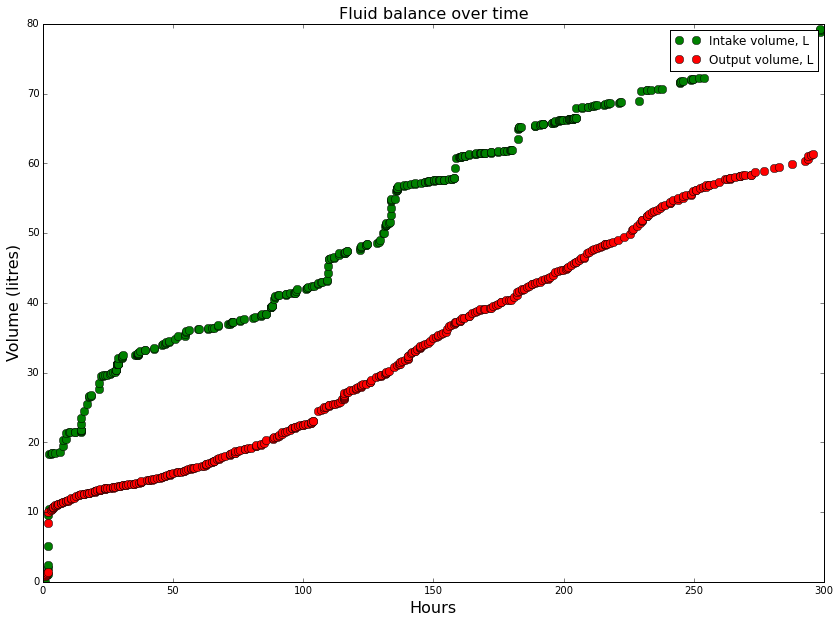

In [117]:
plt.figure(figsize=(14, 10))

# Plot the cumulative input against the cumulative output
plt.plot(ie.hours_end[ie.amountuom=='mL'], 
         ie.amount[ie.amountuom=='mL'].cumsum()/1000, 
         'go', markersize=8, label='Intake volume, L')

plt.plot(oe.hours, 
         oe.value.cumsum()/1000, 
         'ro', markersize=8, label='Output volume, L')

plt.title('Fluid balance over time',fontsize=16)
plt.xlabel('Hours',fontsize=16)
plt.ylabel('Volume (litres)',fontsize=16)
# plt.ylim(0,38)
plt.legend()

As the plot shows, the patient's intake tends to be above their output (as one would expect!) - but there are periods where they are almost one to one. One of the biggest challenges of working with ICU data is that context is everything - let's look at a treatment (lasix) that we know will affect this graph.

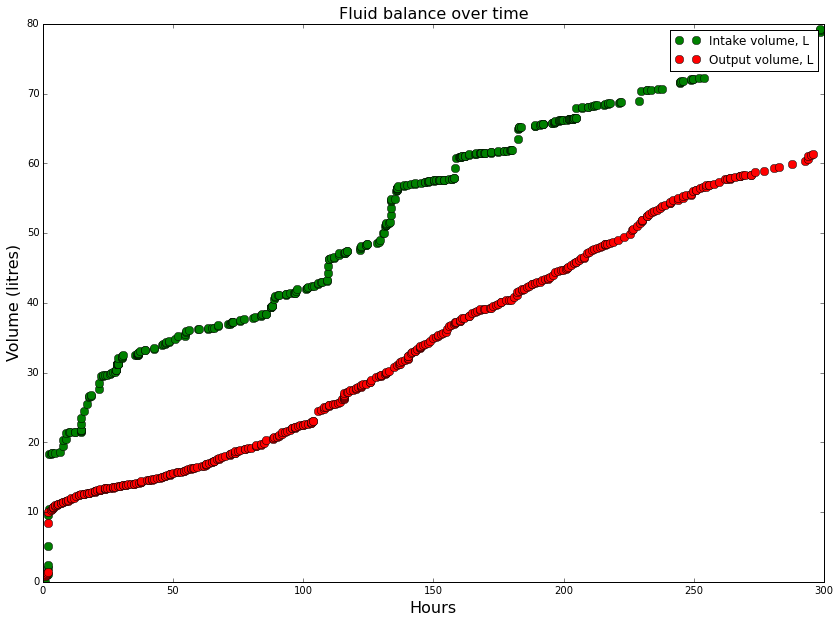

In [119]:
plt.figure(figsize=(14, 10))

# Plot the cumulative input against the cumulative output
plt.plot(ie.hours_end[ie.amountuom=='mL'], 
         ie.amount[ie.amountuom=='mL'].cumsum()/1000, 
         'go', markersize=8, label='Intake volume, L')

plt.plot(oe.hours, 
         oe.value.cumsum()/1000, 
         'ro', markersize=8, label='Output volume, L')

# example on getting two columns from a dataframe: ie[['HOURS_START','HOURS_END']].head()

for i, idx in enumerate(ie.index[ie.label=='Furosemide (Lasix)']):
    plt.plot([ie.hours_start[ie.label=='Furosemide (Lasix)'][idx],
             ie.hours_end[ie.label=='Furosemide (Lasix)'][idx]],
            [ie.rate[ie.label=='Furosemide (Lasix)'][idx],
             ie.rate[ie.label=='Furosemide (Lasix)'][idx]],
            'b-',linewidth=4)
    

plt.title('Fluid balance over time',fontsize=16)
plt.xlabel('Hours',fontsize=16)
plt.ylabel('Volume (litres)',fontsize=16)
# plt.ylim(0,38)
plt.legend()


In [120]:
ie['label'].unique()

array(['Solution', 'Pantoprazole (Protonix)', 'LR', 'Cefazolin',
       'Dextrose 5%', 'OR Platelet Intake', 'OR Cryoprecipitate Intake',
       'OR FFP Intake', 'OR Packed RBC Intake', 'OR Cell Saver Intake',
       'OR Crystalloid Intake', 'NaCl 0.9%', 'Midazolam (Versed)',
       'Propofol', 'Fentanyl', 'Cisatracurium', 'Piggyback',
       'Calcium Gluconate', 'Magnesium Sulfate',
       'Magnesium Sulfate (Bolus)', 'Famotidine (Pepcid)',
       'Heparin Sodium (Prophylaxis)', 'Packed Red Blood Cells', 'K Phos',
       'Potassium Chloride', 'GT Flush', 'Amino Acids',
       'TPN without Lipids', 'Vivonex (Full)', 'Furosemide (Lasix)',
       'Meropenem', 'Replete with Fiber (Full)', 'Gastric Meds',
       'Dextrose PN', 'Insulin - Regular', 'Fentanyl (Concentrate)',
       'TPN w/ Lipids', 'Lorazepam (Ativan)', 'Dexmedetomidine (Precedex)',
       'Haloperidol (Haldol)', 'KCL (Bolus)', 'PO Intake',
       'Heparin Sodium', 'Vancomycin', 'Morphine Sulfate', 'Sterile Water'], dtype=ob

### Exercise 2

* Plot the alarms for the mean arterial pressure ('```Arterial Blood Pressure mean```')
* HINT: you can use ```ce.LABEL.unique()``` to find a list of variable names
* Were the alarm thresholds breached?

In [ ]:
# Exercise 2 here




### Plot 3: Were the patient's other vital signs stable?

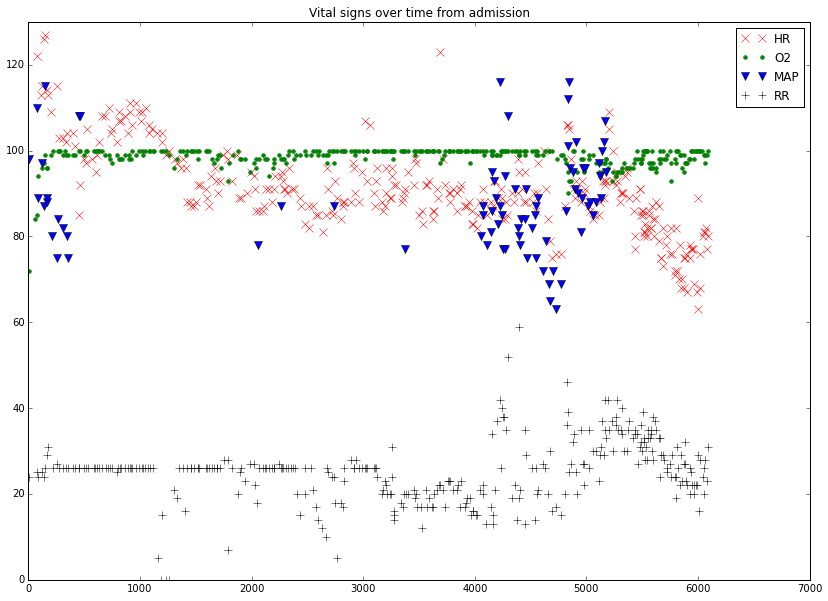

In [127]:
plt.figure(figsize=(14, 10))

plt.plot(ce.index[ce.label=='Heart Rate'], 
         ce.valuenum[ce.label=='Heart Rate'],
         'rx', markersize=8, label='HR')

plt.plot(ce.index[ce.label=='O2 saturation pulseoxymetry'], 
         ce.valuenum[ce.label=='O2 saturation pulseoxymetry'], 
         'g.', markersize=8, label='O2')

plt.plot(ce.index[ce.label=='Arterial Blood Pressure mean'], 
         ce.valuenum[ce.label=='Arterial Blood Pressure mean'], 
         'bv', markersize=8, label='MAP')

plt.plot(ce.index[ce.label=='Respiratory Rate'], 
         ce.valuenum[ce.label=='Respiratory Rate'], 
         'k+', markersize=8, label='RR')

plt.title('Vital signs over time from admission')
plt.ylim(0,130)
plt.legend()

### Plot 5: Laboratory measurements

Using Pandas 'read_csv function' again, we'll now load the labevents data.
This data corresponds to measurements made in a laboratory - usually on a sample of patient blood. 

In [123]:
# OPTION 1: load labevents data using the database connection
query = """
SELECT de.subject_id
  , de.charttime
  , di.label, de.value, de.valuenum
  , de.uom
FROM mimiciii.labevents de
INNER JOIN mimiciii.d_labitems di
  ON de.itemid = di.itemid
where de.subject_id = 49205
"""

le = pd.read_sql_query(query,conn)

# OPTION 2: load labevents from the CSV file
# le = pd.read_csv('data/example_labevents.csv', index_col='HOURSSINCEADMISSION')

In [46]:
# preview the labevents data
le.head()

,SUBJECT_ID,CHARTTIME,LABEL,VALUE,VALUENUM,UOM
0,40080,2106-05-31 13:18:00,ALANINE AMINOTRANSFERASE (ALT),10,10.0,IU/L
1,40080,2106-05-31 13:18:00,ALBUMIN,2.5,2.5,g/dL
2,40080,2106-05-31 13:18:00,ALKALINE PHOSPHATASE,126,126.0,IU/L
3,40080,2106-05-31 13:18:00,ANION GAP,12,12.0,mEq/L
4,40080,2106-05-31 13:18:00,ASPARATE AMINOTRANSFERASE (AST),28,28.0,IU/L


In [125]:
# preview the ioevents data
le[le.label=='HEMOGLOBIN']

,subject_id,charttime,label,value,valuenum,uom
9,49205,2125-11-08 08:22:00,HEMOGLOBIN,12.1,12.1,g/dL
103,49205,2125-11-09 01:45:00,HEMOGLOBIN,11.9,11.9,g/dL
171,49205,2125-11-10 01:35:00,HEMOGLOBIN,10.2,10.2,g/dL
292,49205,2125-11-14 02:03:00,HEMOGLOBIN,8.6,8.6,g/dL
347,49205,2125-11-17 02:58:00,HEMOGLOBIN,9.1,9.1,g/dL
376,49205,2125-11-17 14:12:00,HEMOGLOBIN,9.6,9.6,g/dL
382,49205,2125-11-08 00:14:00,HEMOGLOBIN,11.6,11.6,g/dL
399,49205,2125-11-08 00:14:00,HEMOGLOBIN,10.3,10.3,g/dL
438,49205,2125-11-11 02:06:00,HEMOGLOBIN,9.7,9.7,g/dL
527,49205,2125-11-13 01:51:00,HEMOGLOBIN,9.1,9.1,g/dL


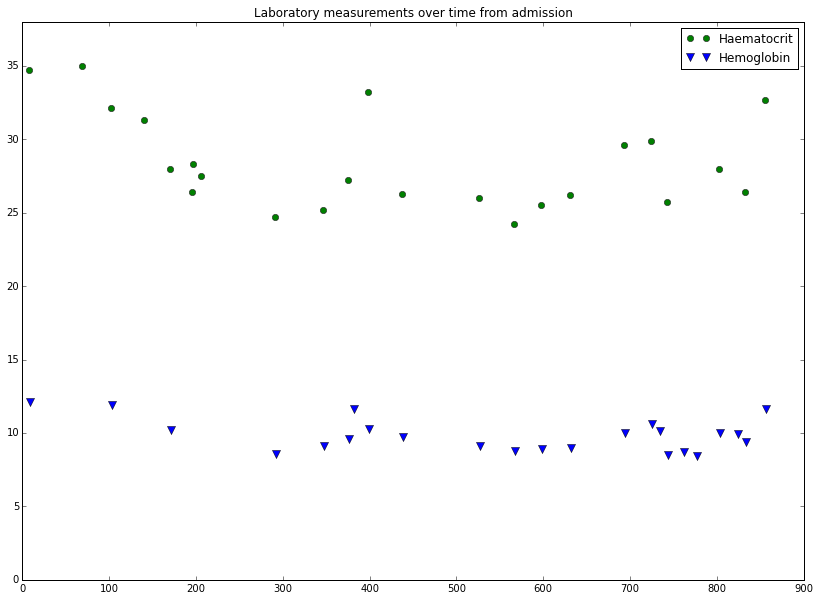

In [126]:
plt.figure(figsize=(14, 10))

plt.plot(le.index[le.label=='HEMATOCRIT'], 
         le.valuenum[le.label=='HEMATOCRIT'], 
         'go', markersize=6, label='Haematocrit')

plt.plot(le.index[le.label=='HEMOGLOBIN'], 
         le.valuenum[le.label=='HEMOGLOBIN'], 
         'bv', markersize=8, label='Hemoglobin')

plt.title('Laboratory measurements over time from admission')
plt.ylim(0,38)
plt.legend()